# COVID Government Response Paper Data Analysis

# TO DO:


- [ ] Need to explore the missingness of the Oxford data. Sort the countries by GDP and examine what the missingness matrix looks like. **If you could run imputation on this data then you would have a major leg up on the other paper working on the similar topic. (on to of the other benefits to your paper)**
- [ ] Continue to update this **[file](https://1drv.ms/x/s!AjWX5HOdYY23kf9x5S7g8LKLGlseVg?e=992nsi)** of data source locations 
- [ ] 
- [ ] 

In [1]:
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15 ,9
import numpy as np
import seaborn as sns
import datetime
from matplotlib.pyplot import figure
import os
from pathlib import Path
import shutil
import missingno as msno

In [2]:
data_path = '..\Modified Data Sets'
control_data_path = '..\Control Data'
graphics_path = '..\graphics'
day_file_path = glob(f'{data_path}\Final COVID Data Set*.xlsx')[0]
week_file_path = glob(f'{data_path}\Final Weekly COVID Data Set*.xlsx')[0]

In [3]:
df = pd.read_excel(day_file_path)
df_week = pd.read_excel(week_file_path) 

In [13]:
df = df.loc[~df.case_count.isnull()].copy()
df['dup'] = df.duplicated(['country'],keep='last')

In [14]:
df.columns

Index(['country', 'countrycode', 'date', 'case_count', 'death_count',
       'school_close', 'domestic_travel', 'internat_travel', 'large_gather',
       'public_events', 'stay_home', 'gdp_rank', 'gdp_in_mil_us',
       'smoking_ihme_2019', 'pop_2020',
       'un_population_division_median_age_2017',
       'ages_65_and_above_of_total_population',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age', 'diabetes_prev_ages_20_to_79',
       'deaths_smoking_sex_both_age_age_standardized_rate',
       'cancer_prevalence', 'htn_prevalence', 'copd_dalys_per_100000',
       'obesity_ihme_2019', 'country_vulnerability', 'emergency_preparedness',
       'gov_efficiency', 'quarantine_efficiency', 'total_score',
       'mers_case_count', 'sars_case_count', 'number_of_deathsa',
       'number_of_imported_cases', 'percent_of_imported_cases',
       'mers_sars_max', 'mers_sars_sum', 'mers_sars_exp1', 'mers_sars_exp5',
       'mers_sars_exp10', 'mers_sars_

In [15]:
miss_anal = df.loc[~df.dup]
miss_anal = miss_anal.loc[~miss_anal.quarantine_efficiency.isnull()]

In [16]:
exp_levels= ['mers_sars_exp1', 'mers_sars_exp5',
       'mers_sars_exp10', 'mers_sars_exp20', 'mers_sars_exp100',
       'mers_sars_exp200', 'mers_sars_exp300', 'mers_sars_exp400',
       'mers_sars_exp500', 'mers_sars_exp1000']

In [17]:
for levels in exp_levels:
    print('_'*5,f'MERS/SARS Exp. Threshold Level: {levels[13:]} Case(s)','_'*5)
    print(miss_anal[levels].value_counts().to_frame(name='Frequency of Exp. Level'))
    print(round((miss_anal[levels].value_counts()/miss_anal.shape[0])*100,3).to_frame(name='% of Observations'))

_____ MERS/SARS Exp. Threshold Level: 1 Case(s) _____
   Frequency of Exp. Level
0                      139
1                       43
   % of Observations
0             76.374
1             23.626
_____ MERS/SARS Exp. Threshold Level: 5 Case(s) _____
   Frequency of Exp. Level
0                      160
1                       22
   % of Observations
0             87.912
1             12.088
_____ MERS/SARS Exp. Threshold Level: 10 Case(s) _____
   Frequency of Exp. Level
0                      169
1                       13
   % of Observations
0             92.857
1              7.143
_____ MERS/SARS Exp. Threshold Level: 20 Case(s) _____
   Frequency of Exp. Level
0                      171
1                       11
   % of Observations
0             93.956
1              6.044
_____ MERS/SARS Exp. Threshold Level: 100 Case(s) _____
   Frequency of Exp. Level
0                      176
1                        6
   % of Observations
0             96.703
1              3.297
_____ 

In [18]:
miss_anal.shape

(182, 51)

In [19]:
miss_anal.case_count

262        10.0
546       165.0
830       136.0
1115        0.0
1399      215.0
          ...  
57187    4631.0
57976     307.0
58502    1887.0
58765      57.0
59049       0.0
Name: case_count, Length: 182, dtype: float64

In [20]:
df_indexed = df.set_index('date')
# df_indexed.case_count.fillna()

In [21]:
df_indexed.columns

Index(['country', 'countrycode', 'case_count', 'death_count', 'school_close',
       'domestic_travel', 'internat_travel', 'large_gather', 'public_events',
       'stay_home', 'gdp_rank', 'gdp_in_mil_us', 'smoking_ihme_2019',
       'pop_2020', 'un_population_division_median_age_2017',
       'ages_65_and_above_of_total_population',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age', 'diabetes_prev_ages_20_to_79',
       'deaths_smoking_sex_both_age_age_standardized_rate',
       'cancer_prevalence', 'htn_prevalence', 'copd_dalys_per_100000',
       'obesity_ihme_2019', 'country_vulnerability', 'emergency_preparedness',
       'gov_efficiency', 'quarantine_efficiency', 'total_score',
       'mers_case_count', 'sars_case_count', 'number_of_deathsa',
       'number_of_imported_cases', 'percent_of_imported_cases',
       'mers_sars_max', 'mers_sars_sum', 'mers_sars_exp1', 'mers_sars_exp5',
       'mers_sars_exp10', 'mers_sars_exp20', 'mers_s

### Missingness Analysis

In [23]:
miss_anal.country

262         afghanistan
546             albania
830             algeria
1115            andorra
1399             angola
              ...      
57187           czechia
57976        kyrgyzstan
58502          slovakia
58765             syria
59049    western sahara
Name: country, Length: 182, dtype: object

>> ##### Missingness Sorted by GDP Rank

### DF with Control Vars from Our World In Data

>>> df Without Missing Data Removed

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


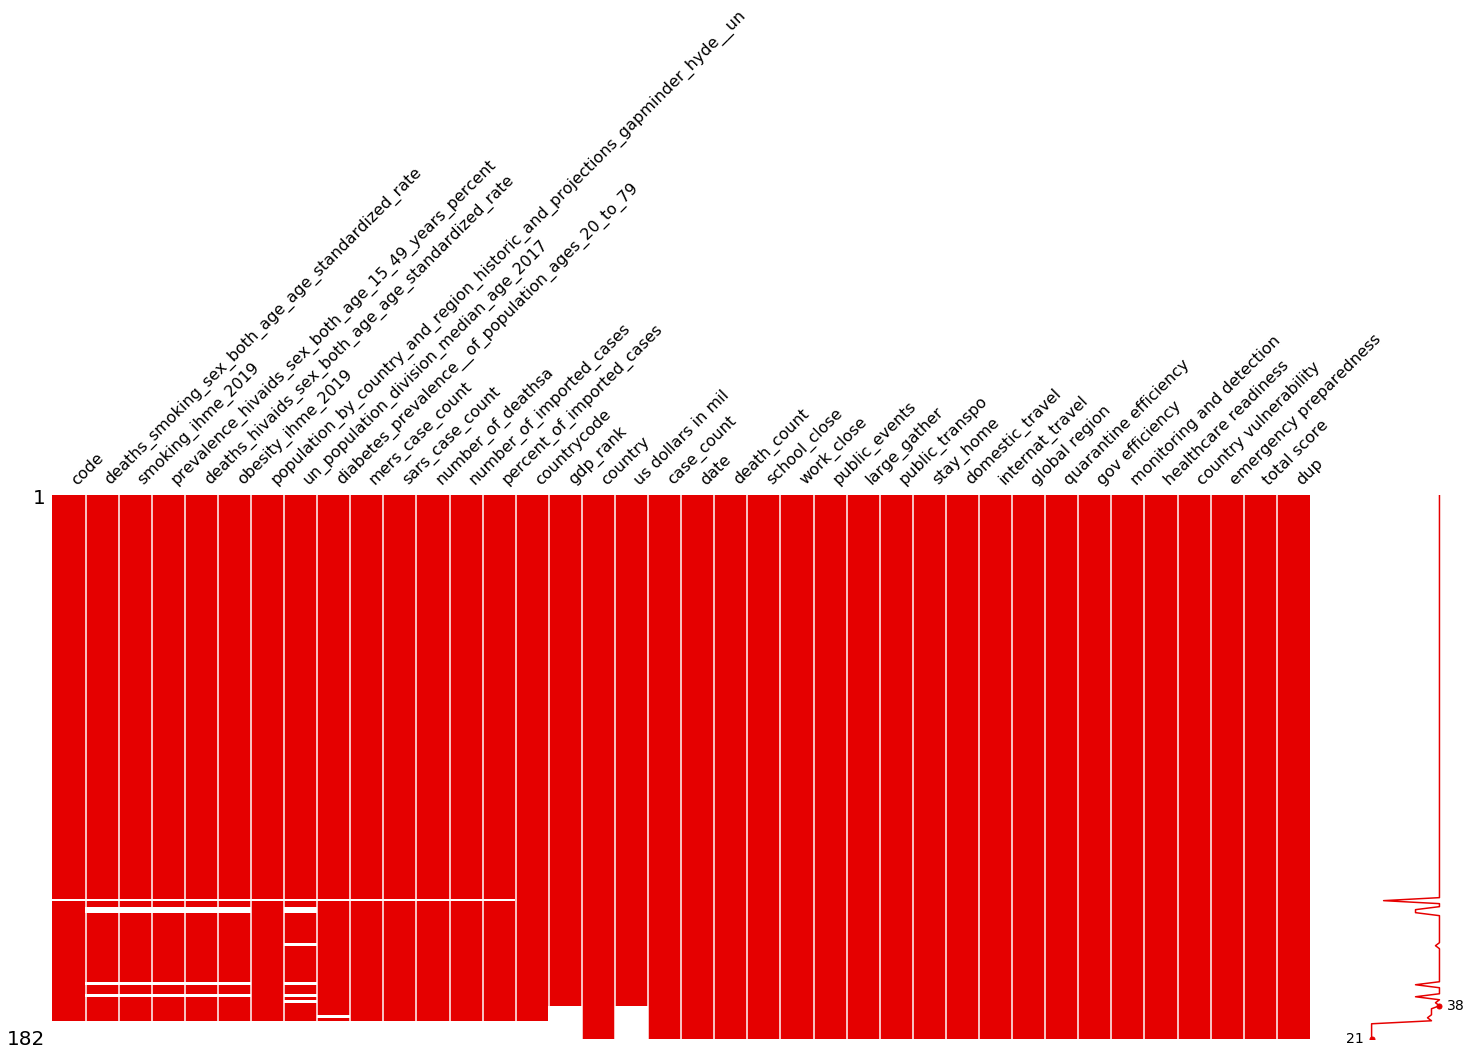

In [122]:
miss_anal_NEW.sort_values(by='gdp_rank',inplace=True)
df_nomiss_NEW = miss_anal_NEW.copy()
msno.matrix(df_nomiss_NEW, color=(0.90, 0.00, 0.00))

>>> df with nearly complete data

In [92]:
df_nomiss_NEW.shape

(188, 38)

In [93]:
df_nomiss_NEW_cc = miss_anal_NEW.loc[~miss_anal_NEW.school_close.isnull()].copy()

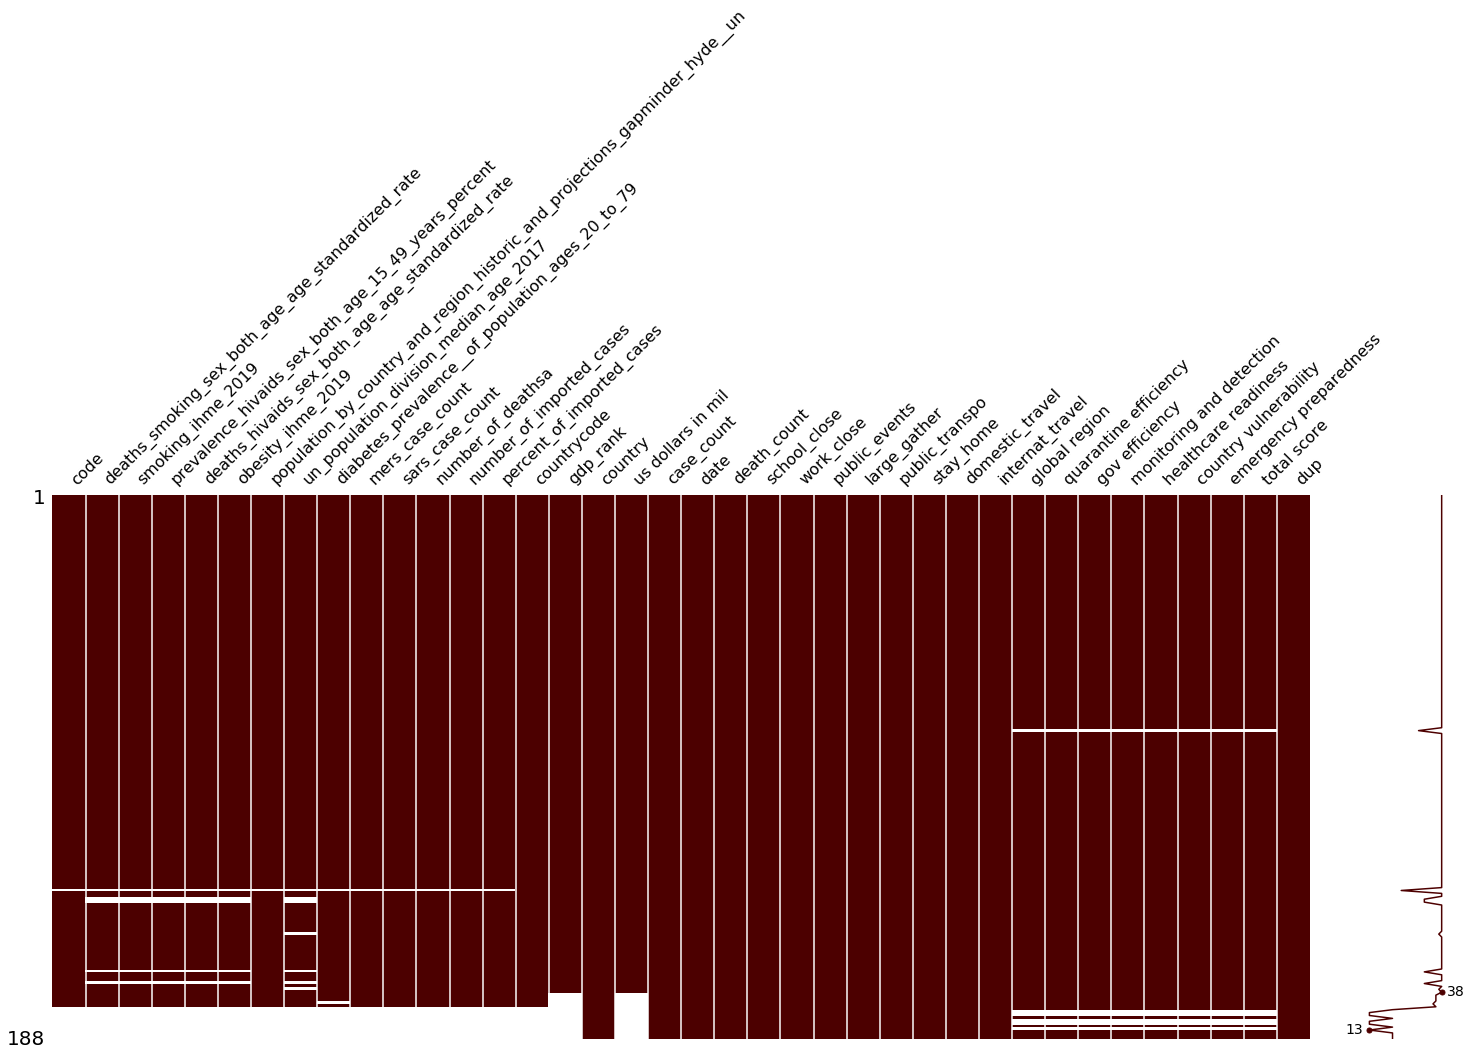

In [95]:
df_nomiss_NEW_cc.sort_values(by='gdp_rank',inplace=True)
msno.matrix(df_nomiss_NEW_cc, color=(0.30, 0.00, 0.00))

## Original Control Variable Data

E:\Anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


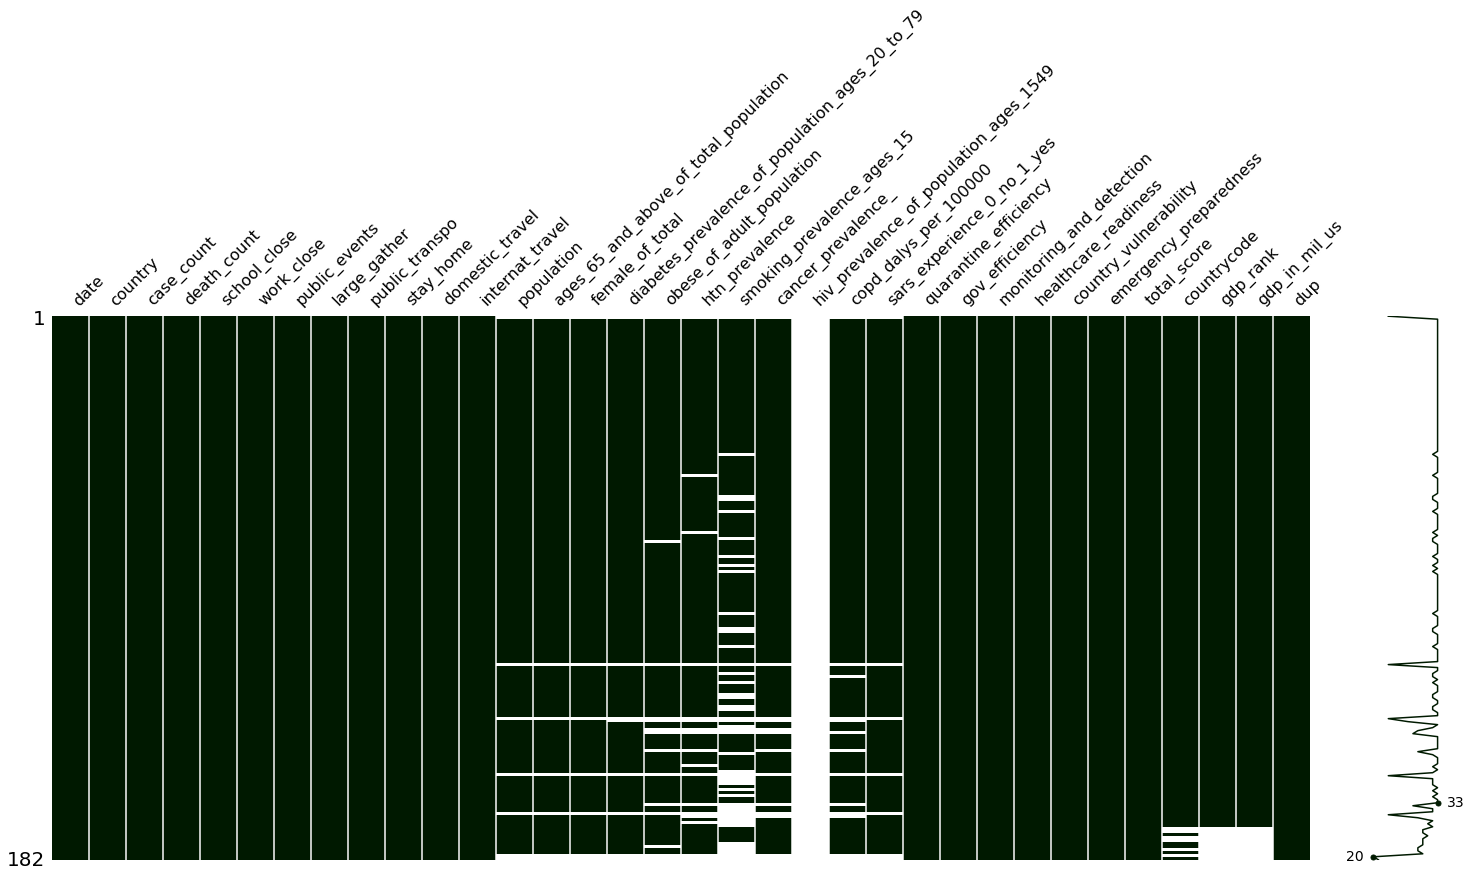

In [123]:
miss_anal.sort_values(by='gdp_rank',inplace=True)
df_nomiss = miss_anal.loc[~miss_anal.case_count.isnull()].copy()
msno.matrix(df_nomiss, color=(0.0, 0.10, 0.00))

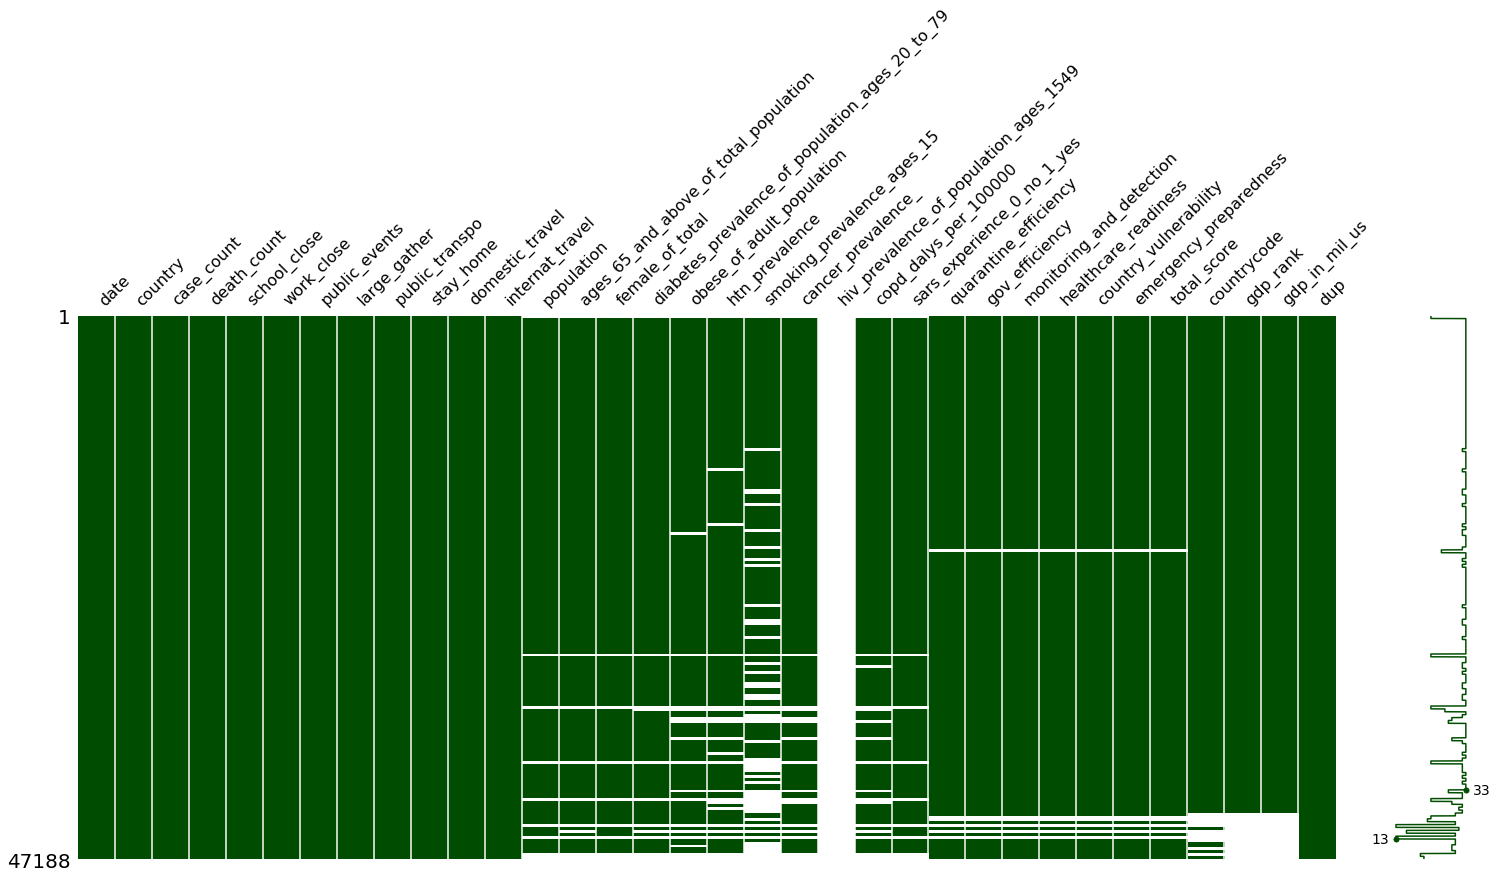

In [99]:
df_nomiss_cc = df_nomiss.loc[~df_nomiss.school_close.isnull()].copy()
msno.matrix(df_nomiss_cc, color=(0.0, 0.30, 0.00))


>> ##### Missingness Sorted by Population

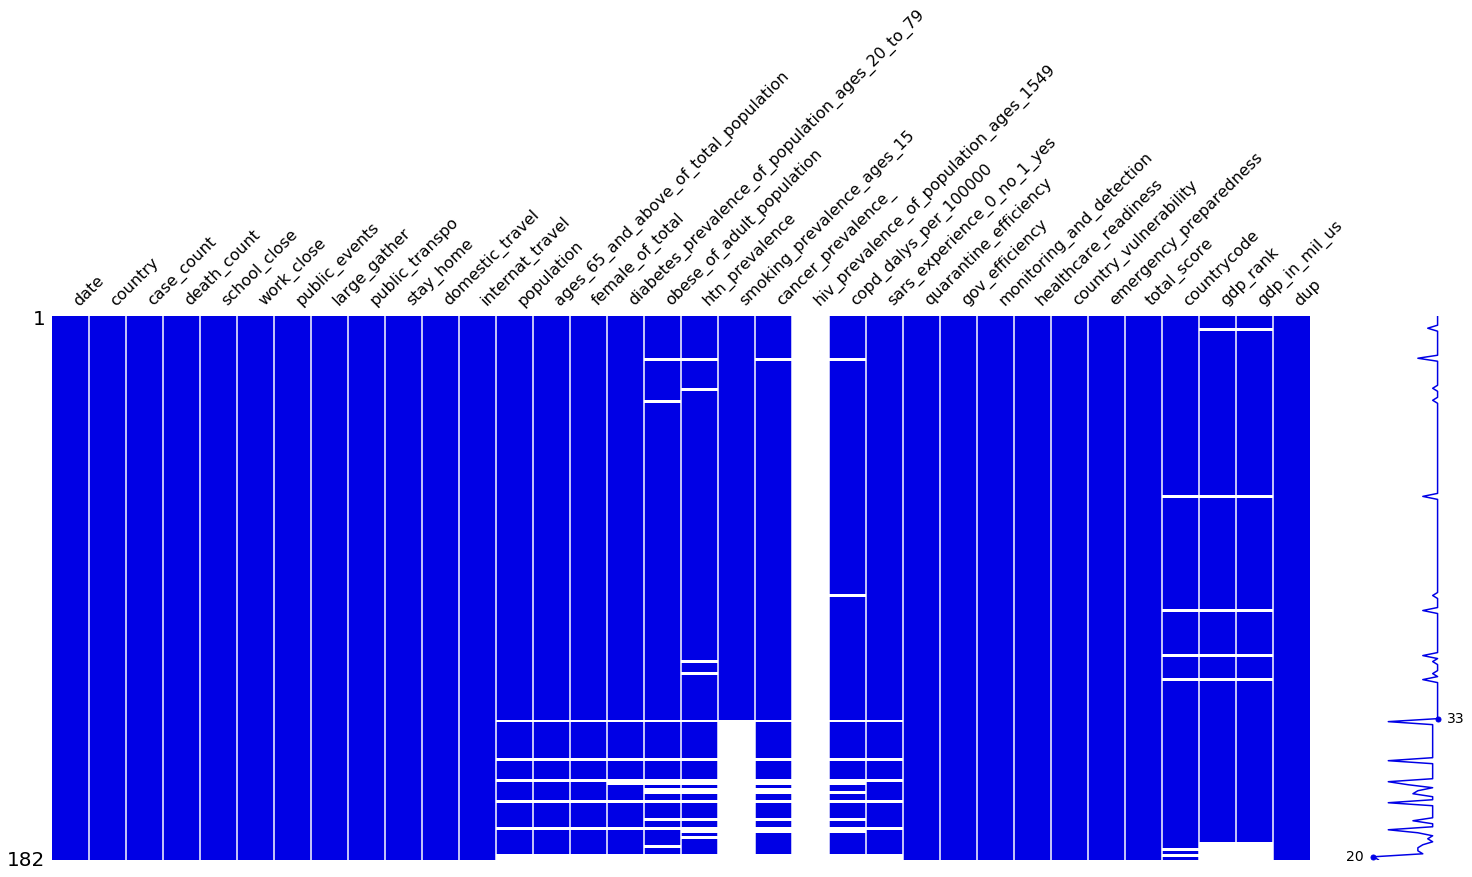

In [124]:
df_nomiss.sort_values(by='smoking_prevalence_ages_15',inplace=True)
msno.matrix(df_nomiss, color=(0.0, 0.00, 0.90))

In [33]:
dir(msno)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'geoplot',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

In [128]:
df_nomiss.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us', 'dup'],
      dtype='object')

In [127]:
df_nomiss_NEW.columns

Index(['code', 'deaths_smoking_sex_both_age_age_standardized_rate',
       'smoking_ihme_2019',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age_age_standardized_rate',
       'obesity_ihme_2019',
       'population_by_country_and_region_historic_and_projections_gapminder_hyde__un',
       'un_population_division_median_age_2017',
       'diabetes_prevalence__of_population_ages_20_to_79', 'mers_case_count',
       'sars_case_count', 'number_of_deathsa', 'number_of_imported_cases',
       'percent_of_imported_cases', 'countrycode', 'gdp_rank', 'country',
       'us dollars in mil', 'case_count', 'date', 'death_count',
       'school_close', 'work_close', 'public_events', 'large_gather',
       'public_transpo', 'stay_home', 'domestic_travel', 'internat_travel',
       'global region', 'quarantine efficiency', 'gov efficiency',
       'monitoring and detection', 'healthcare readiness',
       'country vulnerability', 'emergency preparednes

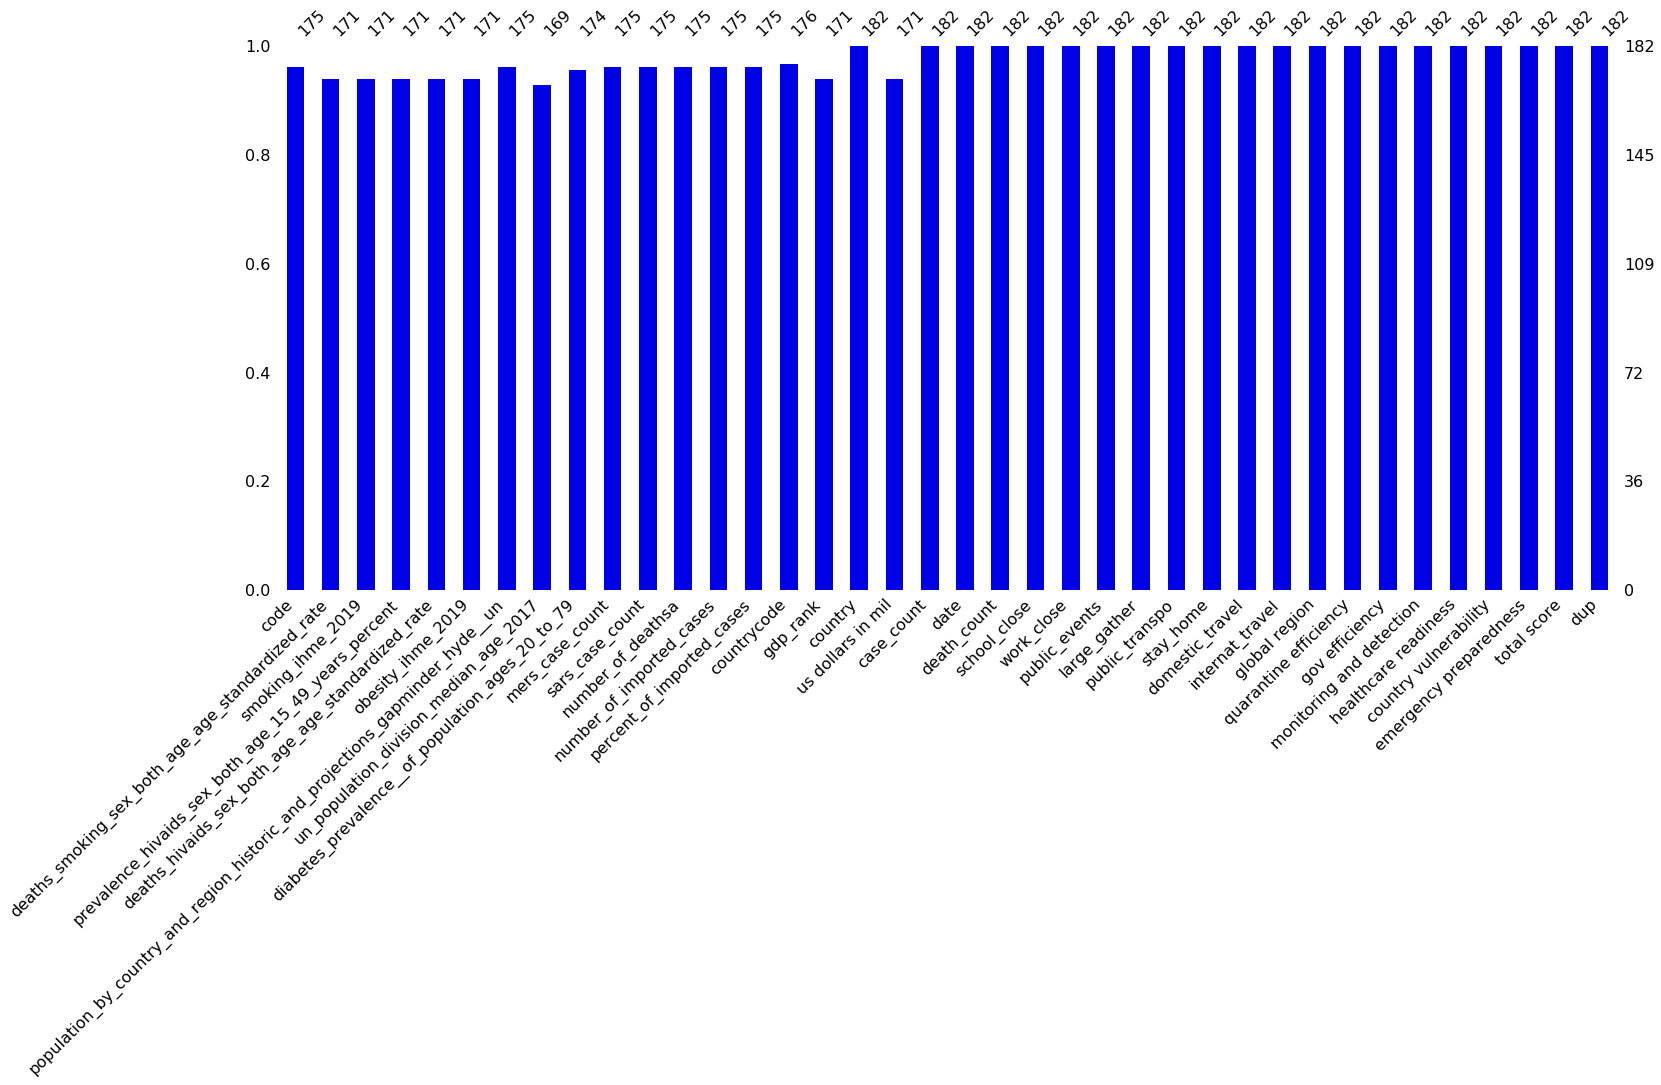

In [125]:
msno.bar(df_nomiss_NEW, color=(0.0, 0.00, 0.90))

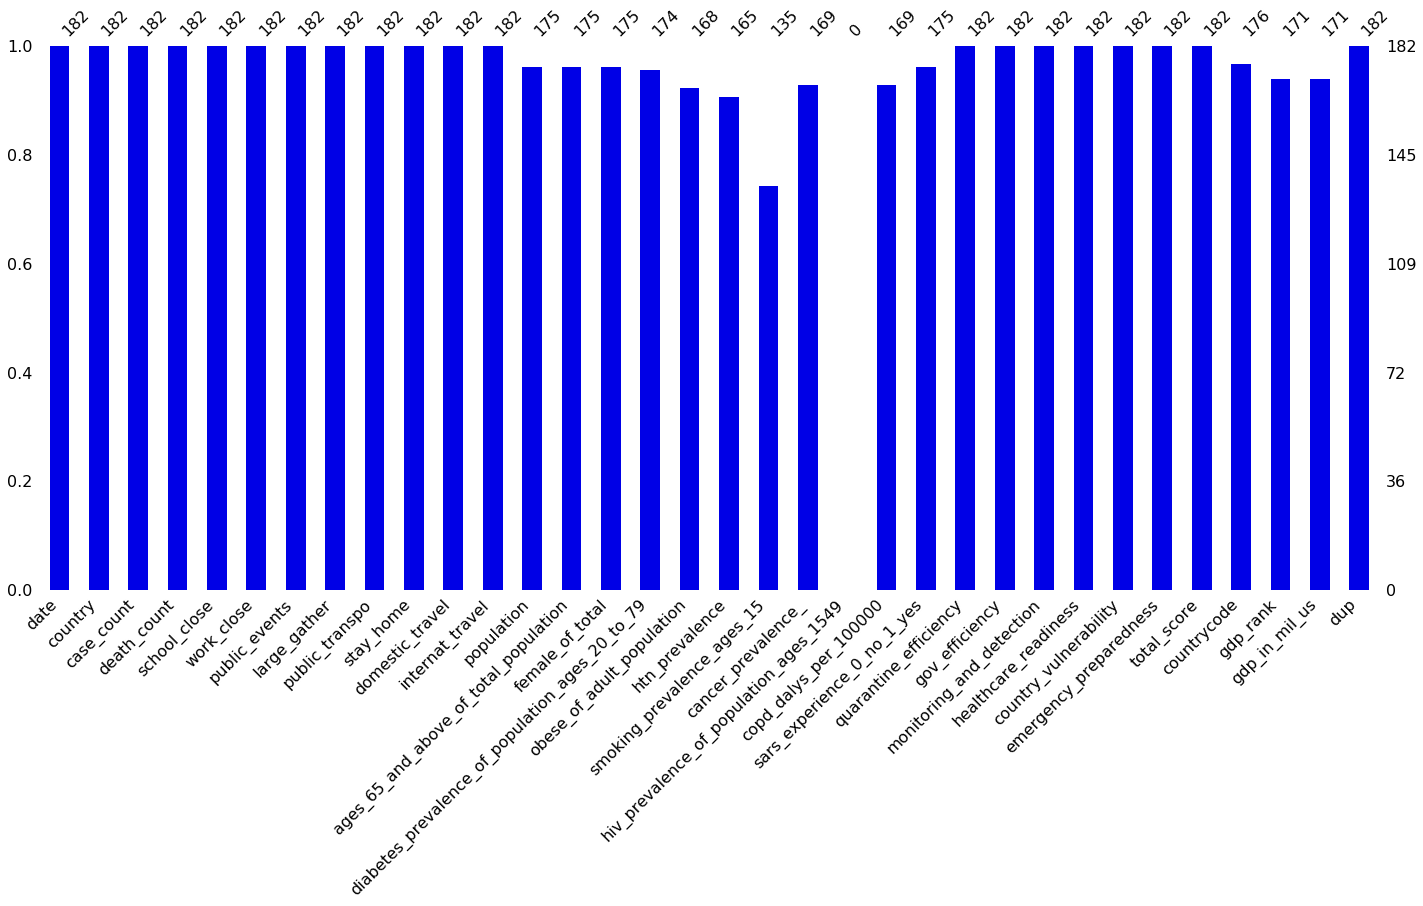

In [126]:
msno.bar(df_nomiss, color=(0.0, 0.00, 0.90))

In [62]:
df.columns

Index(['date', 'country', 'case_count', 'death_count', 'school_close',
       'work_close', 'public_events', 'large_gather', 'public_transpo',
       'stay_home', 'domestic_travel', 'internat_travel', 'population',
       'ages_65_and_above_of_total_population', 'female_of_total',
       'diabetes_prevalence_of_population_ages_20_to_79',
       'obese_of_adult_population', 'htn_prevalence',
       'smoking_prevalence_ages_15', 'cancer_prevalence_',
       'hiv_prevalence_of_population_ages_1549', 'copd_dalys_per_100000',
       'sars_experience_0_no_1_yes', 'quarantine_efficiency', 'gov_efficiency',
       'monitoring_and_detection', 'healthcare_readiness',
       'country_vulnerability', 'emergency_preparedness', 'total_score',
       'countrycode', 'gdp_rank', 'gdp_in_mil_us'],
      dtype='object')

In [52]:
msno.heatmap(df_nomiss)

NameError: name 'df_nomiss' is not defined

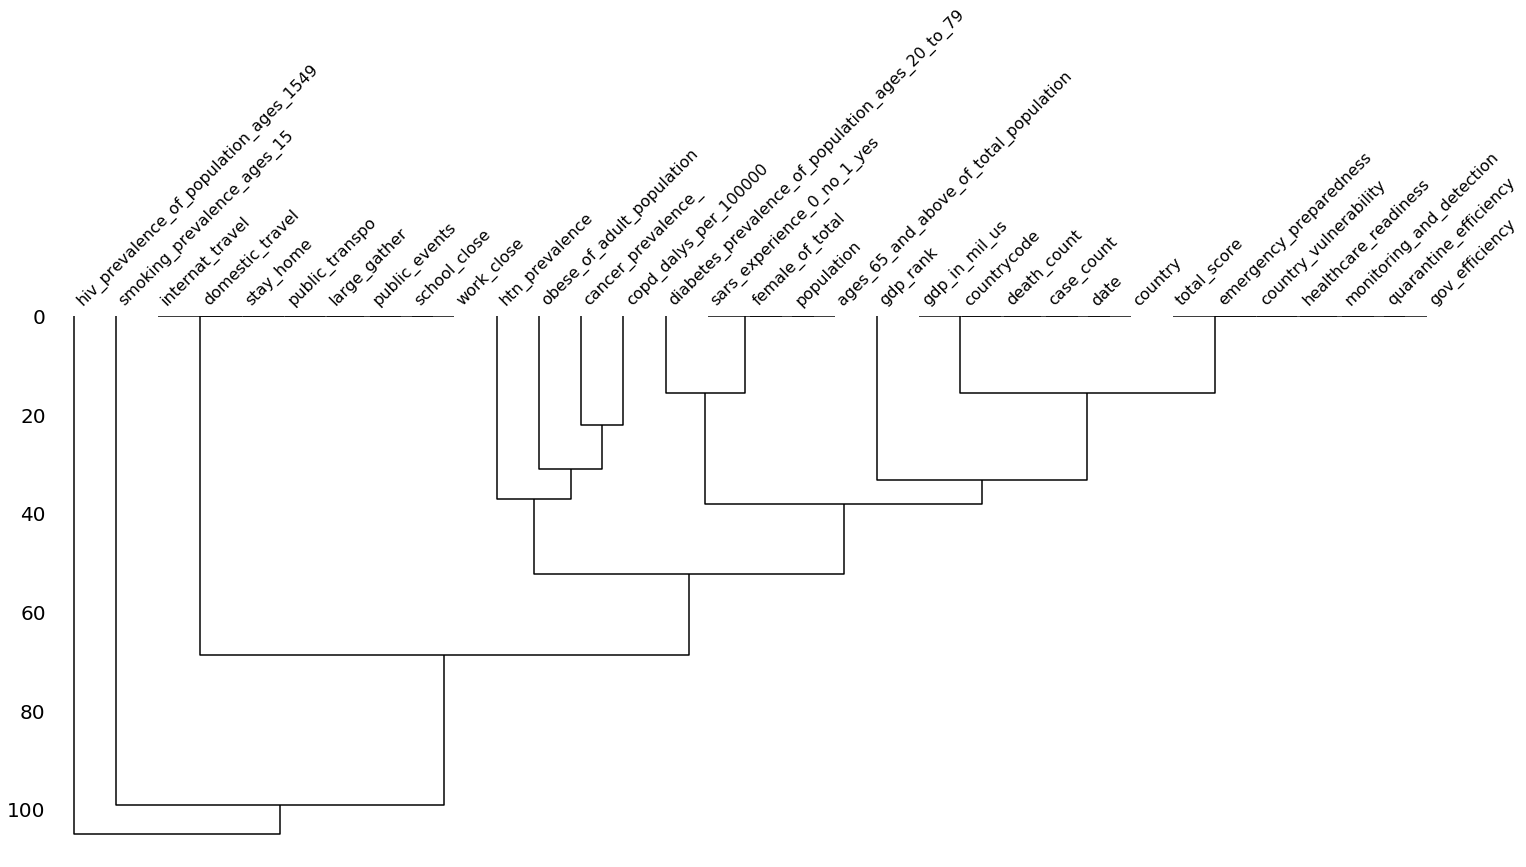

In [81]:
msno.dendrogram(df_nomiss)

In [8]:
msno.dendrogram(df_nomiss_NEW)

NameError: name 'df_nomiss_NEW' is not defined

>### Distribution Analysis

# Modeling Analysis

## Descriptive Analysis

> ### Evaluating Trends

In [18]:
# from statsmodels.tsa.stattools import adfuller
# dftest = adfuller(df_indexed.case_count,autolag='AIC')
# dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'n'])
# for key,value in dftest[4].items():
#     dfoutput[f'Critical Value ({key})']= value
# print(dfoutput)

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Global COVID-19 Daily Case Count by Country')

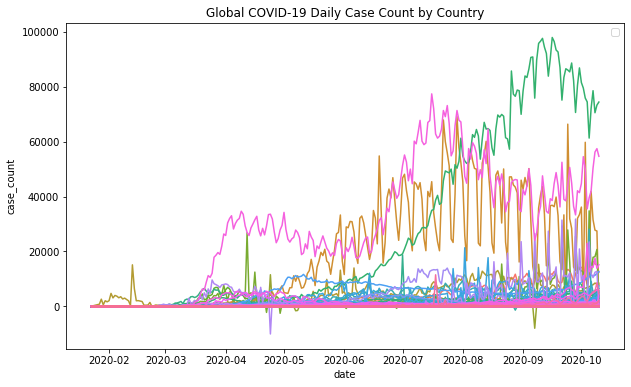

In [35]:
sns.lineplot(x = 'date', y ='case_count', hue = 'country', data = df,legend=False)
plt.legend(loc='best')
plt.title('Global COVID-19 Daily Case Count by Country')

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Global COVID-19 Daily Death Count by Country')

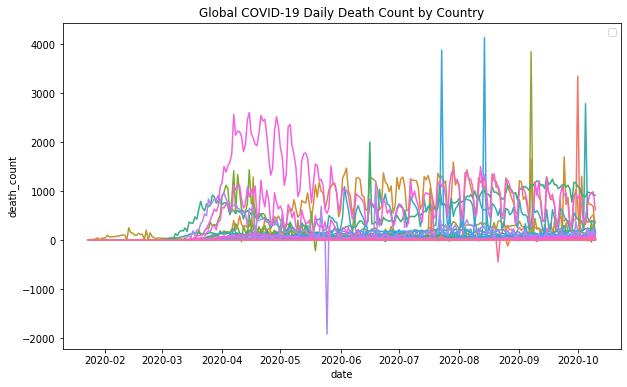

In [36]:
sns.lineplot(x = 'date', y ='death_count', hue = 'country', data = df,legend=False)
plt.title('Global COVID-19 Daily Death Count by Country')

In [ ]:
df.

Text(0.5, 1.0, 'Global COVID-19 Daily 7-Day Rolling Mean & STD of Case Count')

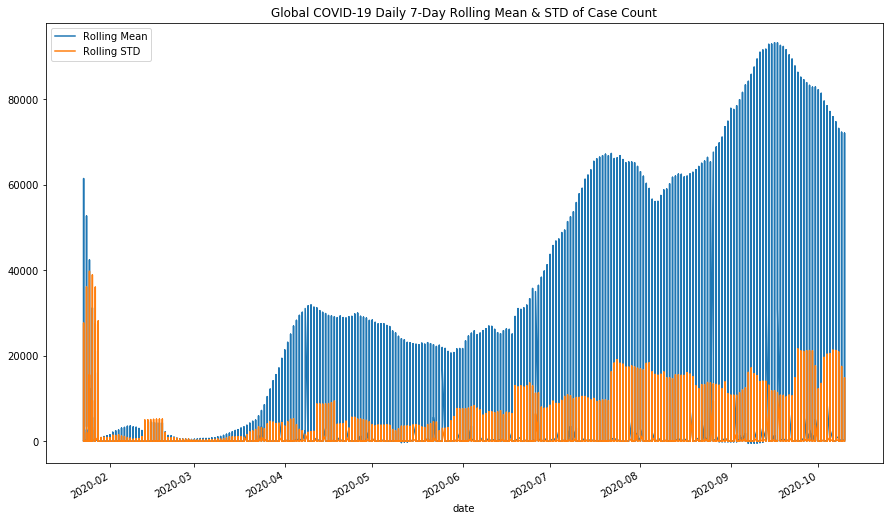

In [74]:
rolmean_case = df_indexed.case_count.rolling(window=7).mean()
rolstd_case = df_indexed.case_count.rolling(window=7).std()
rolmean_case.plot(label='Rolling Mean')
rolstd_case.plot( label='Rolling STD')
plt.legend(loc='best')
plt.title('Global COVID-19 Daily 7-Day Rolling Mean & STD of Case Count')

Text(0.5, 1.0, 'Global COVID-19 Daily 7-Day Rolling Mean & STD of Death Count')

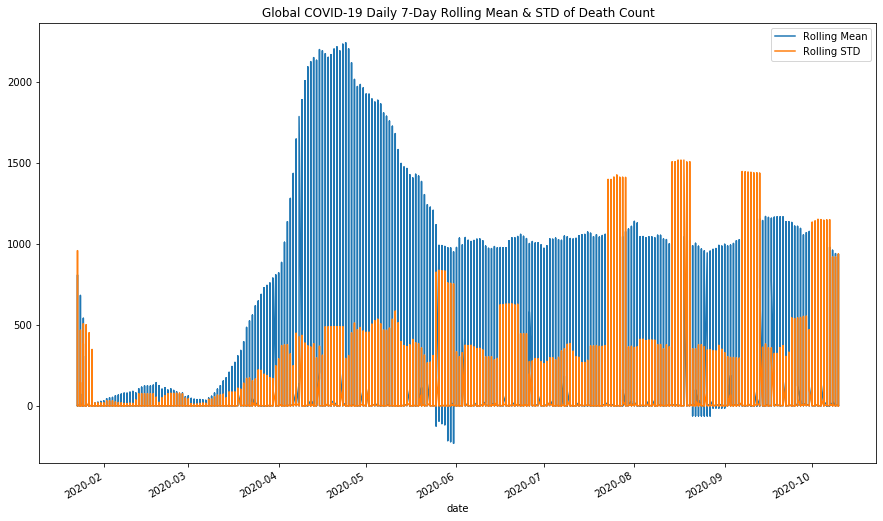

In [51]:
rolmean_death = df_indexed.death_count.rolling(window=7).mean()
rolstd_death = df_indexed.death_count.rolling(window=7).std()
rolmean_death.plot(label='Rolling Mean')
rolstd_death.plot( label='Rolling STD')
plt.legend(loc='best')
plt.title('Global COVID-19 Daily 7-Day Rolling Mean & STD of Death Count')

In [56]:
df[['case_count','death_count']].describe()

,case_count,death_count
count,49256.000000,49256.000000
mean,754.826884,21.769713
std,4626.421729,124.286110
min,-10034.000000,-1918.000000
25%,0.000000,0.000000
50%,9.000000,0.000000
75%,156.000000,3.000000
max,97894.000000,4143.000000


## Maximum COVID Case & Death Counts

In [108]:
most_case = df.case_count.max()
max_sum_case = df.groupby('date')['case_count'].sum().max()
daily_sum_case = df.groupby('date')['case_count'].sum()
most_death = df.death_count.max()
max_sum_death = df.groupby('date')['death_count'].sum().max()
daily_sum_death = df.groupby('date')['death_count'].sum()

Days with the highest total case and death counts

Peak in total daily case counts

In [102]:
daily_sum_case.loc[daily_sum_case == max_sum_case]

date
2020-09-24    361019.0
Name: case_count, dtype: float64

Peak in total daily death counts

In [109]:
daily_sum_death.loc[daily_sum_death == max_sum_death]

date
2020-08-14    10126.0
Name: death_count, dtype: float64

### Highest Single COVID Case Counts

In [118]:
df.groupby('date')['case_count'].sum().sort_values(ascending=False).head(10).to_frame(name='Top 10 Single Day Case Counts')

,Top 10 Single Day Case Counts
date,
2020-09-24,361019.0
2020-10-09,360685.0
2020-10-08,359337.0
2020-10-07,349254.0
2020-09-25,330375.0
2020-10-06,327921.0
2020-09-30,327023.0
2020-10-05,325452.0
2020-09-18,323472.0


### Deadliest Single COVID Days

In [116]:
df.groupby('date')['death_count'].sum().sort_values(ascending=False).head(10).to_frame(name='Top 10 Deadliest Single Days')

,Top 10 Deadliest Single Days
date,
2020-08-14,10126.0
2020-07-23,9897.0
2020-09-07,9312.0
2020-10-01,8700.0
2020-04-17,8367.0
2020-04-15,8351.0
2020-04-07,8231.0
2020-04-09,7773.0
2020-04-10,7392.0


Countries with the highest case and death counts

In [71]:
df.loc[df.case_count == most_case]

,country,countrycode,date,case_count,death_count,school_close,domestic_travel,internat_travel,large_gather,public_events,...,mers_sars_exp100,mers_sars_exp200,mers_sars_exp300,mers_sars_exp400,mers_sars_exp500,mers_sars_exp1000,dayoweek,week,month,dup
22796,india,IND,2020-09-16,97894.0,1132.0,3.0,2.0,4.0,4.0,2.0,...,0,0,0,0,0,0,2.0,38.0,9.0,True


In [34]:
df.loc[df.death_count == most_death]

NameError: name 'most_death' is not defined

In [83]:
rolmean_case.loc[rolmean_case == rolmean_case.max()]

date
2020-09-16    93198.571429
Name: case_count, dtype: float64

In [61]:
print(f'Number of Countries in Data Set: {miss_anal.country.nunique()}')
print(f'Data Start Date: {df.date.min()}\nData End Date: {df.date.max()}')

Number of Countries in Data Set: 182
Data Start Date: 2020-01-23 00:00:00
Data End Date: 2020-10-10 00:00:00


Text(0.5, 1.0, 'Distribution of Case Counts')

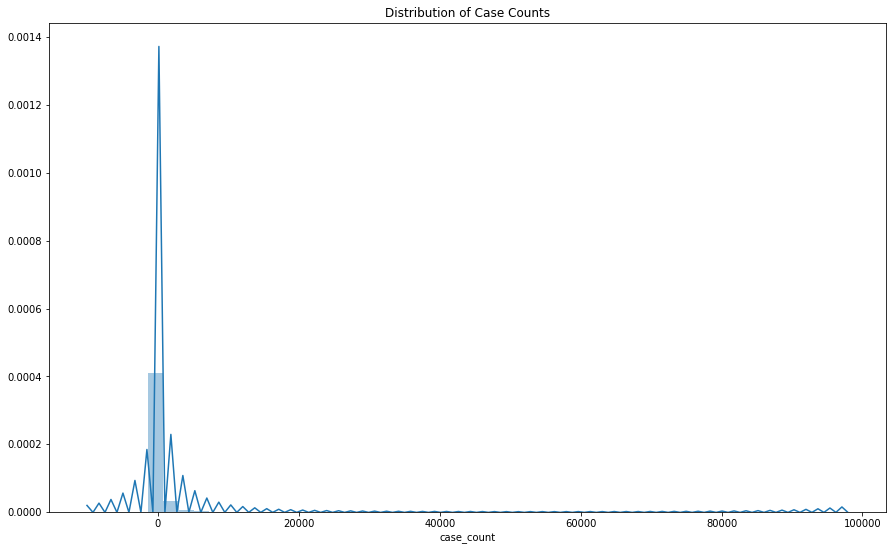

In [64]:
sns.distplot(df.case_count)
plt.title('Distribution of Case Counts')

Text(0.5, 1.0, 'Distribution of Death Counts')

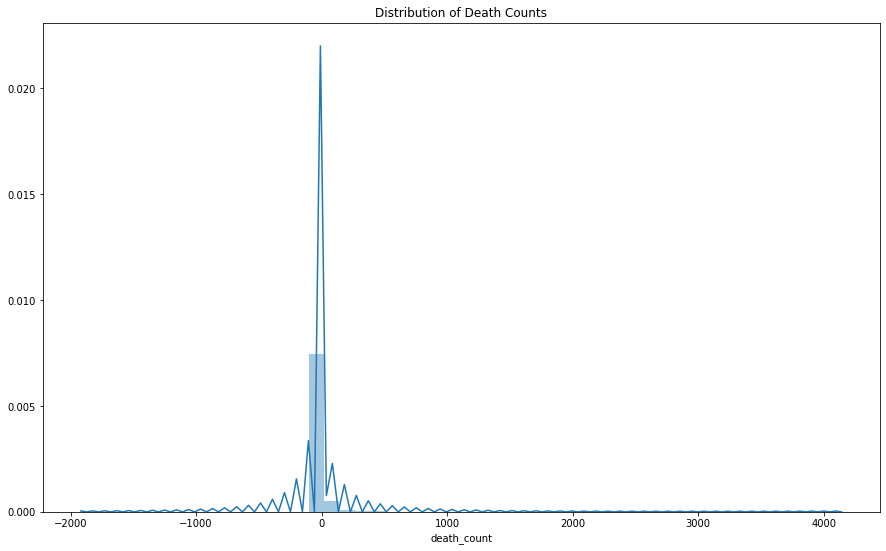

In [65]:
sns.distplot(df.death_count)
plt.title('Distribution of Death Counts')

In [24]:
df.columns

Index(['country', 'countrycode', 'date', 'case_count', 'death_count',
       'school_close', 'domestic_travel', 'internat_travel', 'large_gather',
       'public_events', 'stay_home', 'gdp_rank', 'gdp_in_mil_us',
       'smoking_ihme_2019', 'pop_2020',
       'un_population_division_median_age_2017',
       'ages_65_and_above_of_total_population',
       'prevalence_hivaids_sex_both_age_15_49_years_percent',
       'deaths_hivaids_sex_both_age', 'diabetes_prev_ages_20_to_79',
       'deaths_smoking_sex_both_age_age_standardized_rate',
       'cancer_prevalence', 'htn_prevalence', 'copd_dalys_per_100000',
       'obesity_ihme_2019', 'country_vulnerability', 'emergency_preparedness',
       'gov_efficiency', 'quarantine_efficiency', 'total_score',
       'mers_case_count', 'sars_case_count', 'number_of_deathsa',
       'number_of_imported_cases', 'percent_of_imported_cases',
       'mers_sars_max', 'mers_sars_sum', 'mers_sars_exp1', 'mers_sars_exp5',
       'mers_sars_exp10', 'mers_sars_

In [44]:
min_date = pd.to_datetime('01-01-2020')
max_date = pd.to_datetime('10-24-2020')

Text(0.5, 1, 'COVID-19 Daily Case Counts for France')

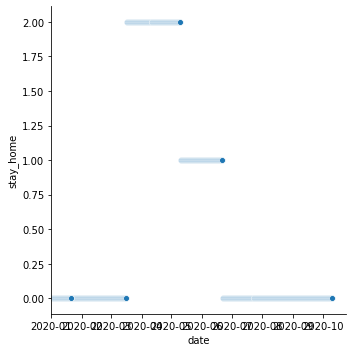

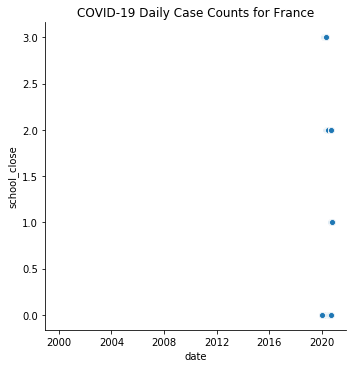

In [54]:
country= 'france'

sns.relplot(x='date', y='stay_home', data= df.loc[df.country==country],label=f'{country[0].upper()}{country[1:]}')
plt.xlim([min_date,max_date])
plt.title(f'COVID-19 Daily Case Counts for {country[0].upper()}{country[1:]}')

# plt.axhline(y=0, c='black')

## Exploring Negative Values

In [35]:
df.loc[df.death_count < 0]

,country,countrycode,date,case_count,death_count,school_close,domestic_travel,internat_travel,large_gather,public_events,...,mers_sars_exp20,mers_sars_exp100,mers_sars_exp200,mers_sars_exp300,mers_sars_exp400,mers_sars_exp500,mers_sars_exp1000,dayoweek,week,month
1397,angola,AGO,2020-10-08,233.0,-3.0,2.0,2.0,2.0,4.0,2.0,...,0,0,0,0,0,0,0,3.0,41.0,10.0
2362,australia,AUS,2020-06-01,19.0,-1.0,2.0,2.0,4.0,3.0,2.0,...,0,0,0,0,0,0,0,0.0,23.0,6.0
2696,austria,AUT,2020-07-21,84.0,-1.0,0.0,0.0,2.0,2.0,1.0,...,0,0,0,0,0,0,0,1.0,30.0,7.0
4699,belgium,BEL,2020-08-26,583.0,-117.0,1.0,0.0,3.0,4.0,2.0,...,0,0,0,0,0,0,0,2.0,35.0,8.0
10674,colombia,COL,2020-09-08,-315.0,-4.0,3.0,0.0,4.0,3.0,2.0,...,0,0,0,0,0,0,0,1.0,37.0,9.0
13176,cuba,CUB,2020-08-14,55.0,-1.0,3.0,2.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,4.0,33.0,8.0
13329,cyprus,CYP,2020-04-05,20.0,-2.0,3.0,2.0,4.0,4.0,2.0,...,0,0,0,0,0,0,0,6.0,14.0,4.0
13932,denmark,DNK,2020-05-12,78.0,-6.0,2.0,1.0,4.0,3.0,1.0,...,0,0,0,0,0,0,0,1.0,20.0,5.0
16549,estonia,EST,2020-08-02,7.0,-6.0,0.0,0.0,2.0,1.0,0.0,...,0,0,0,0,0,0,0,6.0,31.0,8.0
17283,finland,FIN,2020-04-06,249.0,-1.0,2.0,2.0,4.0,1.0,2.0,...,0,0,0,0,0,0,0,0.0,15.0,4.0


In [6]:
df.loc[df.case_count < 0]['country'].unique()

array(['antigua and barbuda', 'benin', 'china', 'colombia', 'cyprus',
       'ecuador', 'finland', 'france', 'gambia', 'guyana', 'honduras',
       'italy', 'jordan', 'lithuania', 'luxembourg', 'madagascar',
       'malta', 'mauritius', 'nepal', 'new zealand', 'niger',
       'papua new guinea', 'portugal', 'spain', 'taiwan', 'uganda',
       'uruguay', 'yemen', 'zimbabwe', 'monaco', 'san marino'],
      dtype=object)

In [8]:
neg = df.loc[df.case_count < 0]['country']

In [9]:
neg_country = neg.unique()

In [10]:
len(neg_country )

31

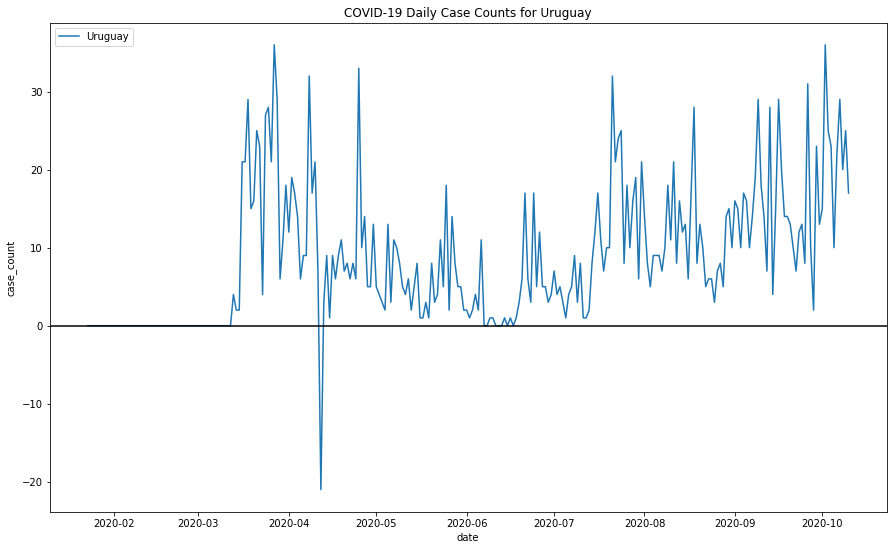

In [31]:
country= 'uruguay'
sns.lineplot(x='date', y='case_count', data= df.loc[df.country==country],label=f'{country[0].upper()}{country[1:]}')
plt.title(f'COVID-19 Daily Case Counts for {country[0].upper()}{country[1:]}')
plt.axhline(y=0, c='black')

In [57]:
nc = pd.DataFrame()
for country in neg_country:
    nc = pd.concat([nc,df.loc[df.country == country]])

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Countries With Negative Values for Case Count')

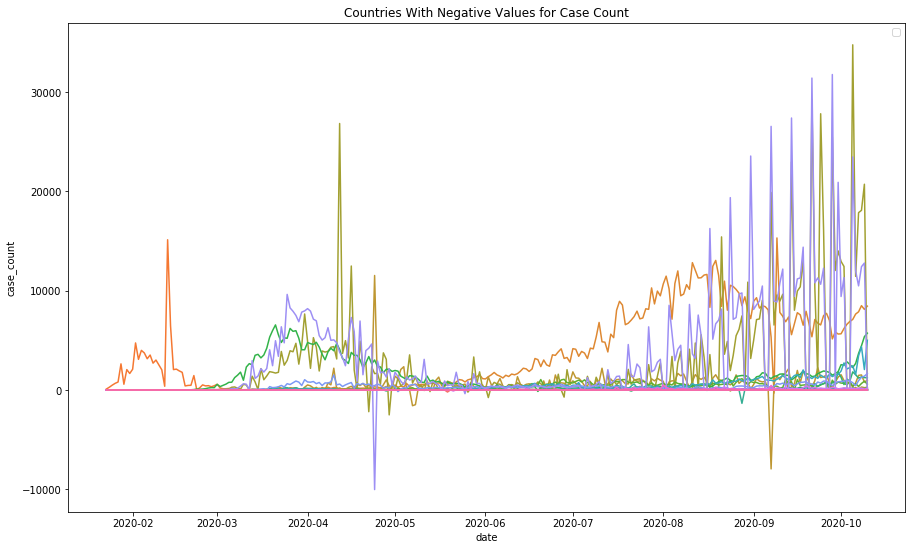

In [58]:
sns.lineplot(x = 'date', y ='case_count', hue = 'country', data = nc,legend=False)
plt.legend(loc='best')
plt.title('Countries With Negative Values for Case Count')

In [50]:
neg_country

array(['antigua and barbuda', 'benin', 'china', 'colombia', 'cyprus',
       'ecuador', 'finland', 'france', 'gambia', 'guyana', 'honduras',
       'italy', 'jordan', 'lithuania', 'luxembourg', 'madagascar',
       'malta', 'mauritius', 'nepal', 'new zealand', 'niger',
       'papua new guinea', 'portugal', 'spain', 'taiwan', 'uganda',
       'uruguay', 'yemen', 'zimbabwe', 'monaco', 'san marino'],
      dtype=object)

>> Model specification

\begin{equation}
\tag{2.13}
stack.loss_i = \alpha_n + \beta air_i + e_i, \text{ where } e_i \sim \text{N}(0,\sigma^2) 
\end{equation}

\begin{equation}
\tag{2.7}
\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}
= 
\begin{bmatrix}
\alpha&\beta&0&0&0\\
\alpha&0&\beta&0&0\\
\alpha&0&0&\beta&0\\
\alpha&0&0&0&\beta
\end{bmatrix}
\begin{bmatrix}1\\air_1\\air_2\\air_3\\air_4\end{bmatrix}
+
\begin{bmatrix}e_1\\e_2\\e_3\\e_4\end{bmatrix}
\end{equation}

\[\begin{equation}\tag{2.7}\begin{bmatrix}stack.loss_1\\stack.loss_2\\stack.loss_3\\stack.loss_4\end{bmatrix}=\begin{bmatrix}\alpha&\beta&0&0&0\\ \alpha&0&\beta&0&0\\ \alpha&0&0&\beta&0\\ \alpha&0&0&0&\beta\end{bmatrix}
\end{equation}]